In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r'D:\1\ALY6150\4\medical_costs.csv')
df.head(5)

,Age,Gender,BMI,Children,Tobacco,Area,Cost
0,19,F,27.900,0,yes,SW,16884.92400
1,18,M,33.770,1,no,SE,1725.55230
2,28,M,33.000,3,no,SE,4449.46200
3,33,M,22.705,0,no,NW,21984.47061
4,32,M,28.880,0,no,NW,3866.85520


In [3]:
df_F = df[df['Gender'] == 'F']  
df_M = df[df['Gender'] == 'M']

In [4]:
df_F = df_F.drop('Gender', axis=1)
df_M = df_M.drop('Gender', axis=1)

In [5]:
df_F.describe(include='all')

,Age,BMI,Children,Tobacco,Area,Cost
count,662.000000,662.000000,662.000000,662,662,662.000000
unique,NaN,NaN,NaN,2,4,NaN
top,NaN,NaN,NaN,no,SE,NaN
freq,NaN,NaN,NaN,547,175,NaN
mean,39.503021,30.377749,1.074018,NaN,NaN,12569.578844
std,14.054223,6.046023,1.192115,NaN,NaN,11128.703801
min,18.000000,16.815000,0.000000,NaN,NaN,1607.510100
25%,27.000000,26.125000,0.000000,NaN,NaN,4885.158700
50%,40.000000,30.107500,1.000000,NaN,NaN,9412.962500
75%,51.750000,34.313750,2.000000,NaN,NaN,14454.691825


In [6]:
df_M.describe(include='all')

,Age,BMI,Children,Tobacco,Area,Cost
count,676.000000,676.000000,676.000000,676,676,676.000000
unique,NaN,NaN,NaN,2,4,NaN
top,NaN,NaN,NaN,no,SE,NaN
freq,NaN,NaN,NaN,517,189,NaN
mean,38.917160,30.943129,1.115385,NaN,NaN,13956.751178
std,14.050141,6.140435,1.218986,NaN,NaN,12971.025915
min,18.000000,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,26.410000,0.000000,NaN,NaN,4619.134000
50%,39.000000,30.687500,1.000000,NaN,NaN,9369.615750
75%,51.000000,34.992500,2.000000,NaN,NaN,18989.590250


In [7]:
# Convert categorical variables into numeric representations
label_encoder = LabelEncoder()
df['Tobacco'] = label_encoder.fit_transform(df['Tobacco'])     # 0:  No   1: Yes
df['Gender'] = label_encoder.fit_transform(df['Gender'])       # 0:  F    1: M
df['Area'] = label_encoder.fit_transform(df['Area'])           # 0: 'NE'  1: 'NW', 2: 'SE', 3: 'SW'
df

,Age,Gender,BMI,Children,Tobacco,Area,Cost
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
df_gender_F = df[df['Gender'] == 0]  
df_gender_M = df[df['Gender'] == 1]

In [10]:
df_gender_F = df_gender_F.drop('Gender', axis=1)
df_gender_M = df_gender_M.drop('Gender', axis=1)

In [11]:
X_F = df_gender_F.iloc[:, :-1]  # predictors
y_F = df_gender_F.iloc[:, -1]  # outcome

In [12]:
X_M = df_gender_M.iloc[:, :-1]  # predictors
y_M = df_gender_M.iloc[:, -1]  # outcome

In [13]:
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_F, y_F, test_size=0.2, random_state=1)
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M, test_size=0.2, random_state=1)

In [14]:
X2_F = sm.add_constant(X_train_F) # build Regression model
est_F = sm.OLS(y_train_F,X2_F)
est2_F = est_F.fit()
est2_F.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     234.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          6.62e-131
Time:                        22:47:31   Log-Likelihood:                -5354.5
No. Observations:                 529   AIC:                         1.072e+04
Df Residuals:                     523   BIC:                         1.075e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.089e+04   1518.852     -7.168      0.000   -1.39e+04   -7903.199
Age          259.1195     18.823     13.766      0.000     222.141     296.098
BMI          311.6294     44.078      7.070      0.000     225.038     398.221
Children     475.9417    217.815      2.185      0.029      48.043     903.841
Tobacco     2.169e+04    717.221     30.242      0.000    2.03e+04    2.31e+04
Area        -367.0836    240.931     -1.524      0.128    -840.395     106.228
==============================================================================
Omnibus:                      175.726   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.481
Skew:                           1.662   Prob(JB):                    1.87e-102
Kurtosis:                       6.195   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X2_M = sm.add_constant(X_train_M) # build Regression model
est_M = sm.OLS(y_train_M,X2_M)
est2_M = est_M.fit()
est2_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     410.5
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          2.67e-180
Time:                        22:47:33   Log-Likelihood:                -5461.3
No. Observations:                 540   AIC:                         1.093e+04
Df Residuals:                     534   BIC:                         1.096e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.187e+04   1487.431     -7.983      0.000   -1.48e+04   -8952.739
Age          251.2252     18.580     13.522      0.000     214.727     287.723
BMI          339.1215     43.528      7.791      0.000     253.615     424.628
Children     293.0367    213.452      1.373      0.170    -126.273     712.346
Tobacco     2.512e+04    602.013     41.732      0.000    2.39e+04    2.63e+04
Area        -487.9660    238.937     -2.042      0.042    -957.338     -18.594
==============================================================================
Omnibus:                       78.346   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.075
Skew:                           0.827   Prob(JB):                     2.12e-34
Kurtosis:                       5.039   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_test_M = sm.add_constant(X_test_M)
X_test_F = sm.add_constant(X_test_F)

In [18]:
y_pred_M = est2_M.predict(X_test_M)
y_pred_F = est2_M.predict(X_test_F)

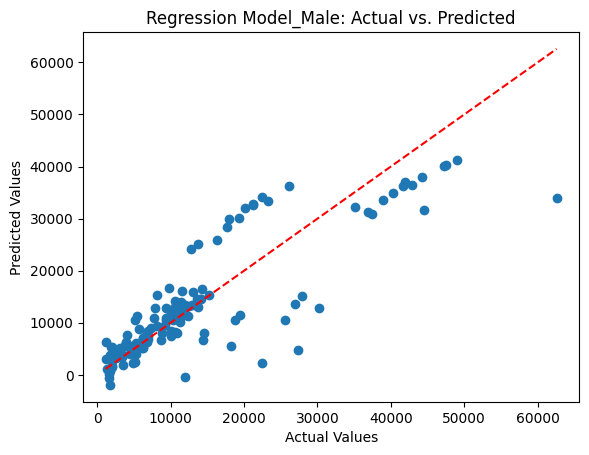

In [19]:
# Plot predicted values against actual values
plt.scatter(y_test_M, y_pred_M)
plt.plot([min(y_test_M), max(y_test_M)], [min(y_test_M), max(y_test_M)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model_Male: Actual vs. Predicted')
plt.show()

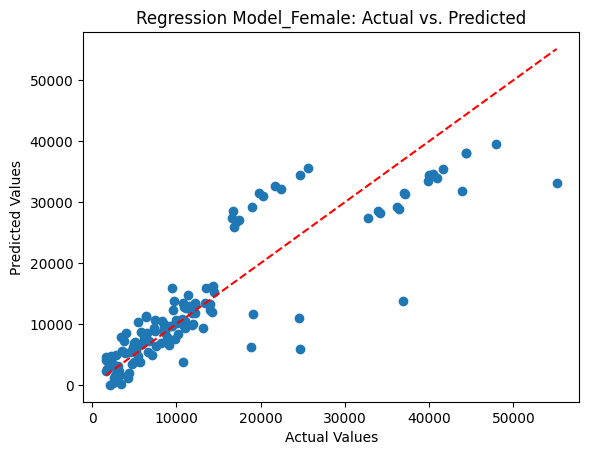

In [20]:
# Plot predicted values against actual values
plt.scatter(y_test_F, y_pred_F)
plt.plot([min(y_test_F), max(y_test_F)], [min(y_test_F), max(y_test_F)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model_Female: Actual vs. Predicted')
plt.show()